Arima

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Patent data and GDP-related data reloaded
patent_data = pd.read_csv('/content/Lv4Nissan1980To2010.csv')
gdp_data = pd.read_csv('/content/gdp_data.csv')

# Show the first few rows of both datasets
patent_data.head(), gdp_data.head()


(  Unnamed: 0  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...  2006  \
 0       A01B     0     0     0     0     0     0     0     0     0  ...     0   
 1       A01C     0     0     0     0     0     0     0     0     0  ...     0   
 2       A01D     0     0     0     0     0     0     0     0     0  ...     0   
 3       A01F     0     0     0     0     0     0     0     0     0  ...     0   
 4       A01G     0     0     0     0     0     0     0     0     0  ...     0   
 
    2007  2008  2009  2010  2011  2012  2013  2014  2015  
 0     0     0     0     0     0     0     0     0     0  
 1     0     0     0     0     0     0     0     0     0  
 2     0     0     0     0     0     0     0     0     0  
 3     0     0     0     0     0     0     0     0     0  
 4     0     0     0     0     0     0     0     0     0  
 
 [5 rows x 37 columns],
                            year      1980      1981       1982       1983  \
 0                       rate(%)       2.8      

In [2]:
# Check patent data for missing and duplicate values
patent_missing_values = patent_data.isnull().sum().sum()
patent_duplicate_rows = patent_data.duplicated().sum()

# Check for missing and duplicate values in GDP-related data
gdp_missing_values = gdp_data.isnull().sum().sum()
gdp_duplicate_rows = gdp_data.duplicated().sum()

patent_missing_values, patent_duplicate_rows, gdp_missing_values, gdp_duplicate_rows


(0, 0, 0, 0)

In [3]:
# Calculate descriptive statistics of patent data
patent_data_description = patent_data.describe()

# Calculation of descriptive statistics for GDP-related data (numerical columns only)
gdp_data_description = gdp_data.describe()

patent_data_description, gdp_data_description


(             1980        1981        1982        1983        1984        1985  \
 count  645.000000  645.000000  645.000000  645.000000  645.000000  645.000000   
 mean     0.924031    0.674419    0.643411    0.668217    1.153488    0.751938   
 std      5.820460    4.703578    4.738501    5.351467    6.955471    4.832009   
 min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
 
              1986        1987        1988        1989  ...        2006  \
 count  645.000000  645.000000  645.000000  645.000000  ...  645.000000   
 mean     0.595349    0.770543    0.415504    0.432558  ...    0.937984   
 std      4.790549    5.516779    4

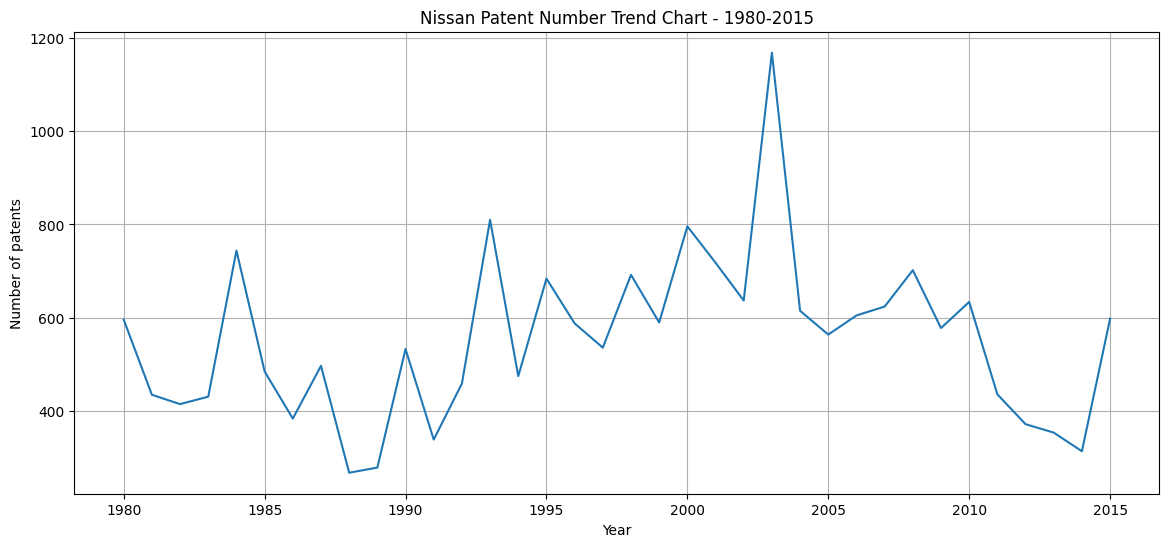

In [4]:
# Calculate the total annual number of patents
annual_patent_sum = patent_data.sum(numeric_only=True)

plt.figure(figsize=(14, 6))
annual_patent_sum.plot()
plt.title("Nissan Patent Number Trend Chart - 1980-2015")
plt.xlabel("Year")
plt.ylabel("Number of patents")
plt.grid(True)
plt.show()


In [5]:
# View column names for GDP data
gdp_data.columns

Index(['year', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object')

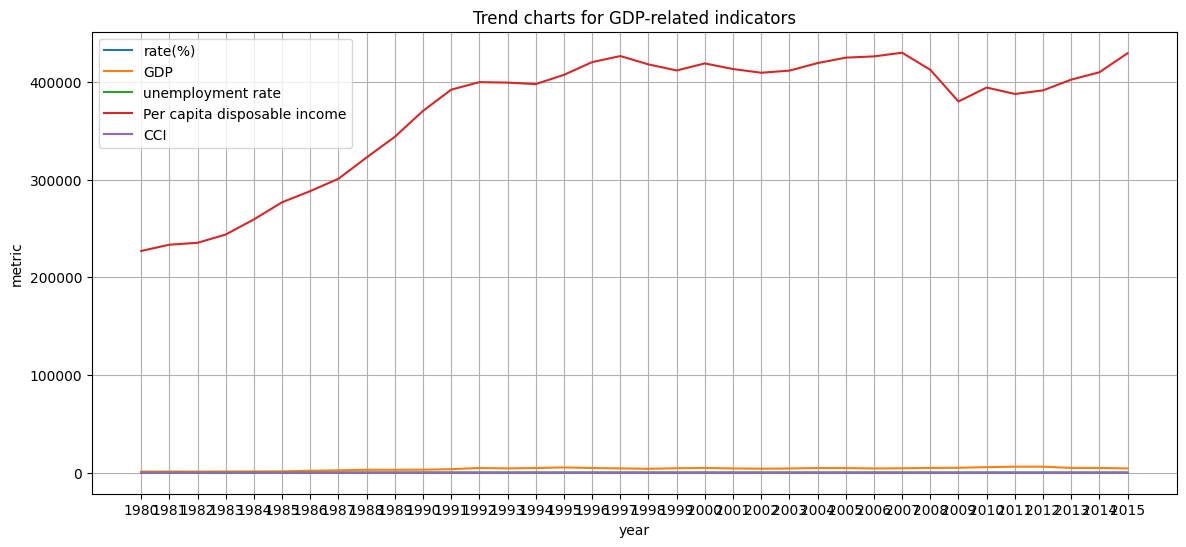

In [6]:
# Transfer of GDP data
gdp_data_transposed = gdp_data.set_index("year").transpose().reset_index()
gdp_data_transposed = gdp_data_transposed.rename(columns={"index": "Year"})

# Charting trends in GDP-related indicators
plt.figure(figsize=(14, 6))

for column in gdp_data_transposed.columns[1:]:
    plt.plot(gdp_data_transposed["Year"], gdp_data_transposed[column], label=column)

plt.title("Trend charts for GDP-related indicators")
plt.xlabel("year")
plt.ylabel("metric")
plt.legend()
plt.grid(True)
plt.show()


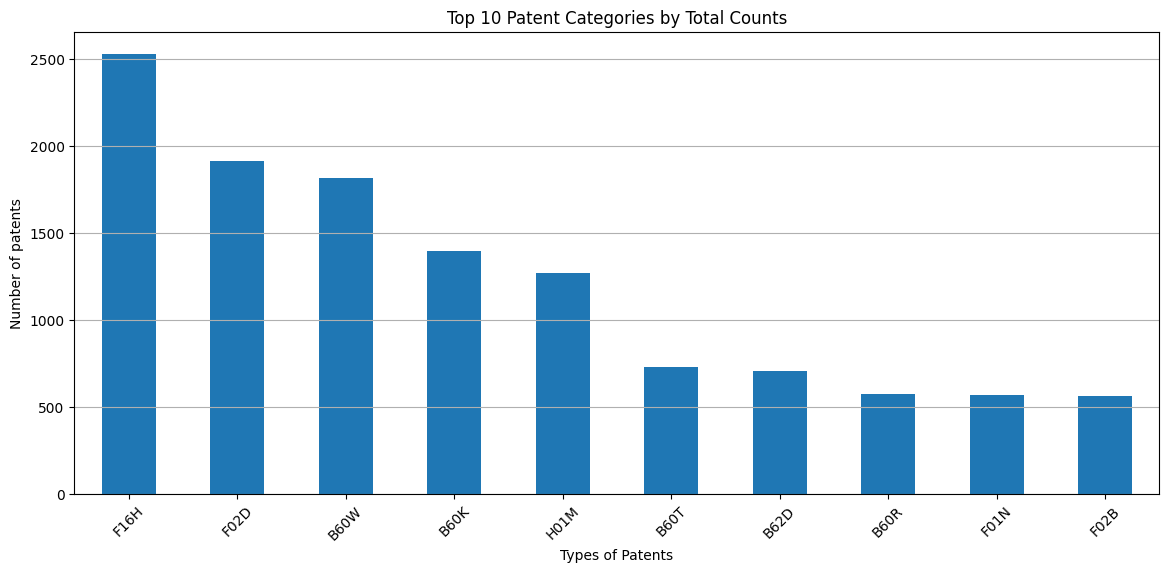

In [7]:
# Calculate the total number for each patent category
patent_category_sum = patent_data.set_index("Unnamed: 0").sum(axis=1)

# Select the top 10 patent categories with the most total counts
top_patent_categories = patent_category_sum.nlargest(10)

plt.figure(figsize=(14, 6))
top_patent_categories.plot(kind='bar')
plt.title("Top 10 Patent Categories by Total Counts")
plt.xlabel("Types of Patents")
plt.ylabel("Number of patents")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


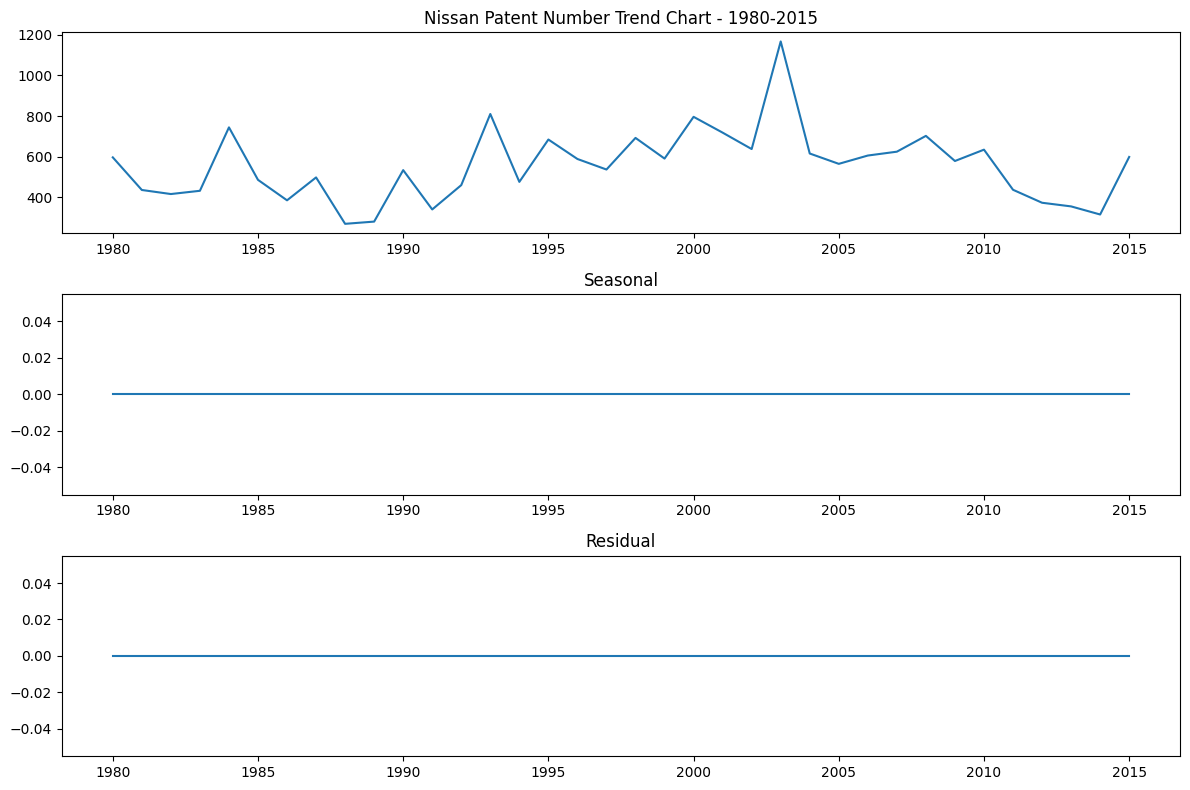

In [8]:
# Perform time series decomposition
result = seasonal_decompose(annual_patent_sum, model='additive', period=1)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
result.trend.plot(title='Nissan Patent Number Trend Chart - 1980-2015')
plt.subplot(3, 1, 2)
result.seasonal.plot(title='Seasonal')
plt.subplot(3, 1, 3)
result.resid.plot(title='Residual')
plt.tight_layout()
plt.show()


In [9]:
# Check the data type of the "Year" column in gdp_data_transposed
gdp_data_transposed["Year"].dtype


dtype('O')

In [10]:
# Convert the "Year" column in gdp_data_transposed to integer type
gdp_data_transposed["Year"] = gdp_data_transposed["Year"].astype(int)


In [11]:
# Since annual_patent_sum is a Series, we first need to convert it to a DataFrame and rename its index column to "Year"
annual_patent_df = annual_patent_sum.reset_index()
annual_patent_df.columns = ["Year", "Total_Patents"]
annual_patent_df["Year"] = annual_patent_df["Year"].astype(int)  # Convert to integer type


In [12]:

combined_data_updated = pd.merge(annual_patent_df, gdp_data_transposed, on="Year", how="left")
combined_data_updated.head()

,Year,Total_Patents,rate(%),GDP,unemployment rate,Per capita disposable income,CCI
0,1980,596,2.8,1105.3,62.0,226959.3,46.00
1,1981,435,4.3,1218.9,61.9,233350.6,45.60
2,1982,415,3.3,1134.5,61.8,235290.3,42.56
3,1983,431,3.6,1243.3,62.1,243793.7,45.05
4,1984,744,4.4,1318.4,61.7,259257.6,47.47


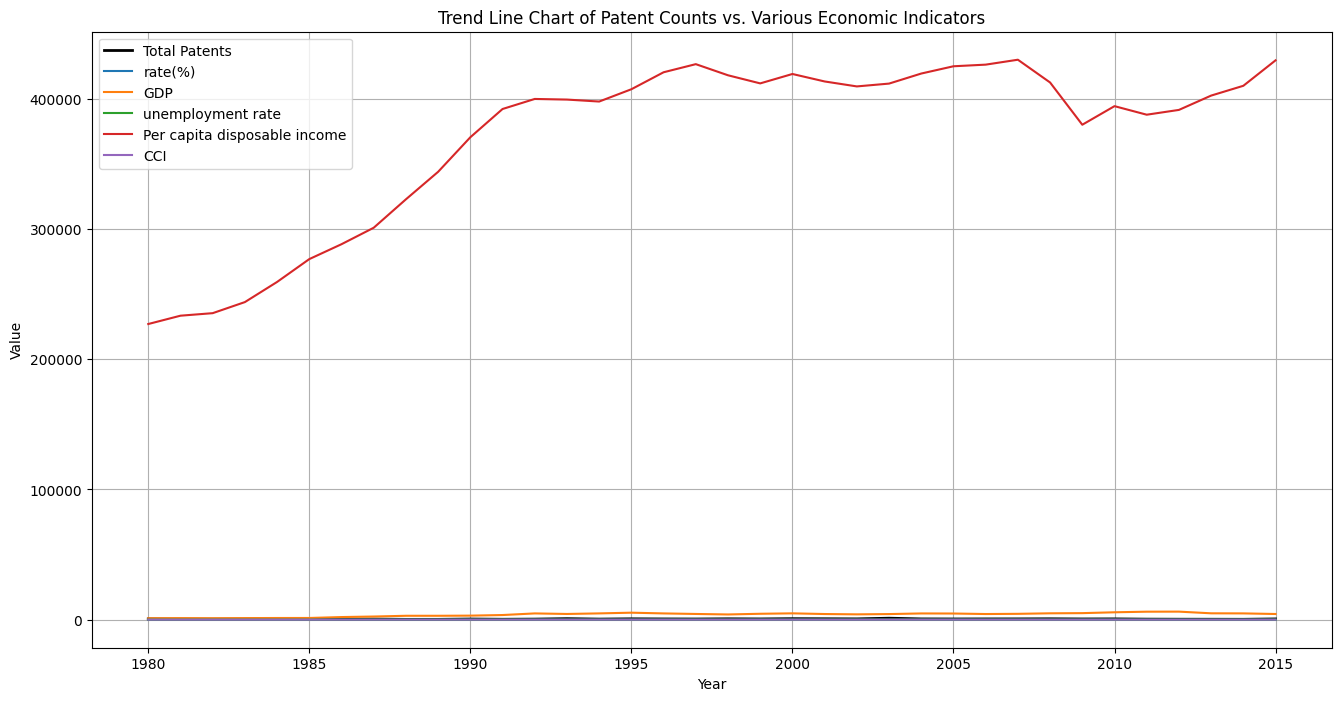

In [13]:
# Plot the trend line chart of patent counts versus various economic indicators
plt.figure(figsize=(16, 8))

# Plot the trend of patent counts
plt.plot(combined_data_updated["Year"], combined_data_updated["Total_Patents"], label="Total Patents", color="black", linewidth=2)

# Plot the trends of various economic indicators
for column in combined_data_updated.columns[2:]:
    plt.plot(combined_data_updated["Year"], combined_data_updated[column], label=column)

plt.title("Trend Line Chart of Patent Counts vs. Various Economic Indicators")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


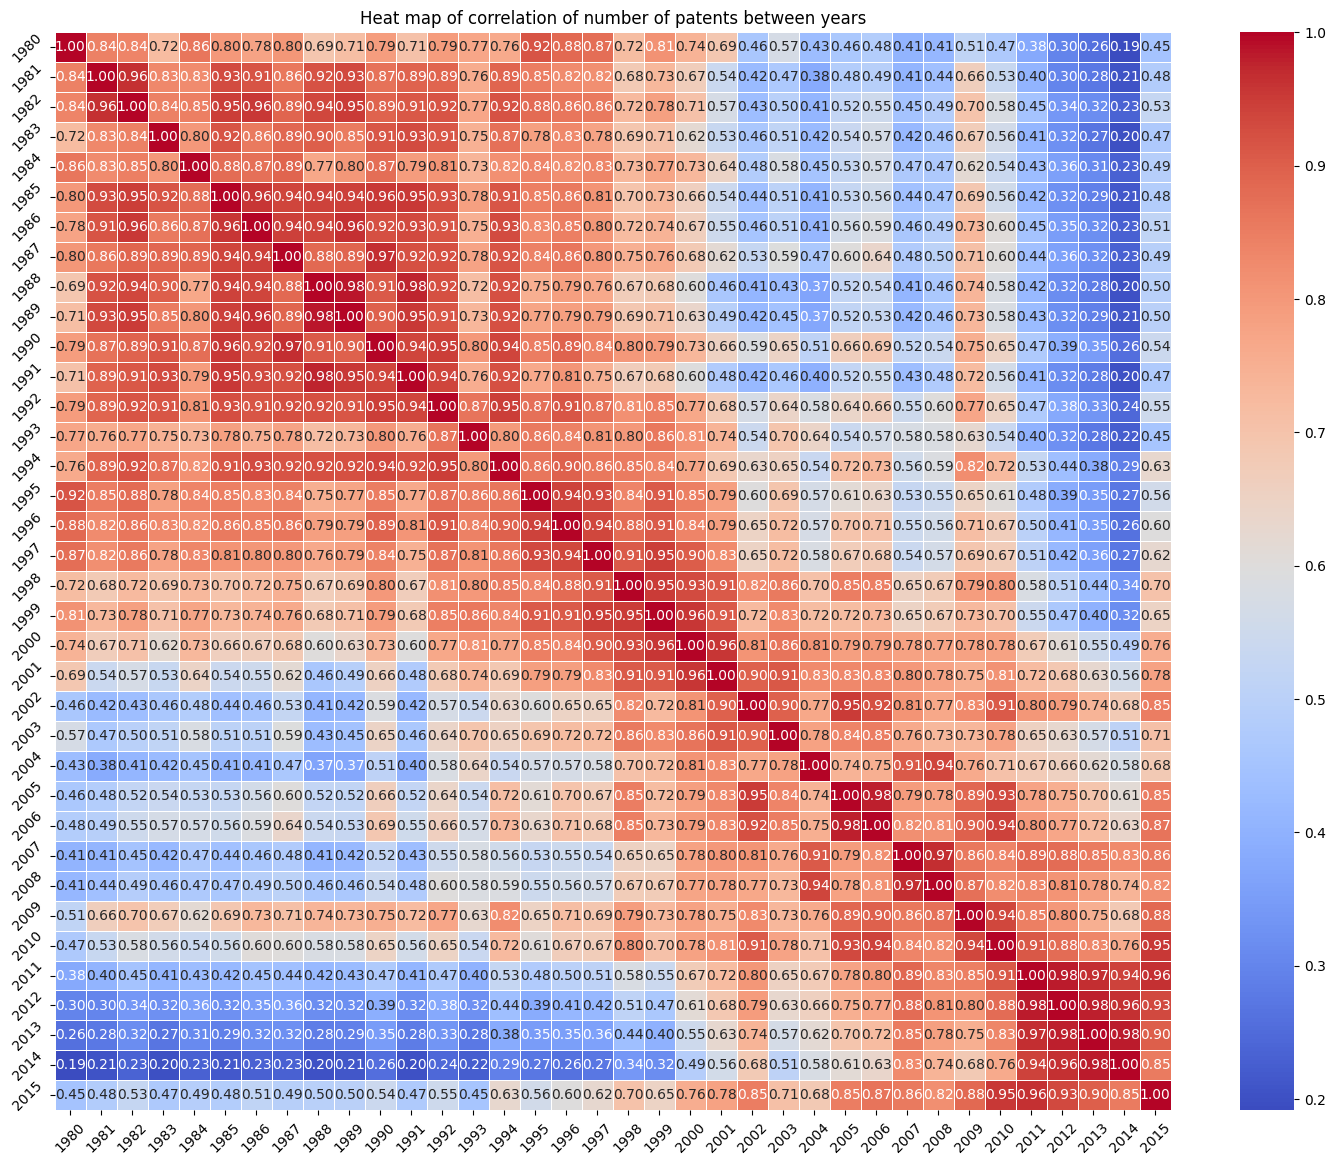

In [14]:
# Calculate the correlation of patent counts between years
patent_correlation_matrix = patent_data.drop(columns=["Unnamed: 0"]).corr()

# Display the correlation of patent counts using a heatmap
plt.figure(figsize=(18, 14))
plt.title('Heat map of correlation of number of patents between years')
sns.heatmap(patent_correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


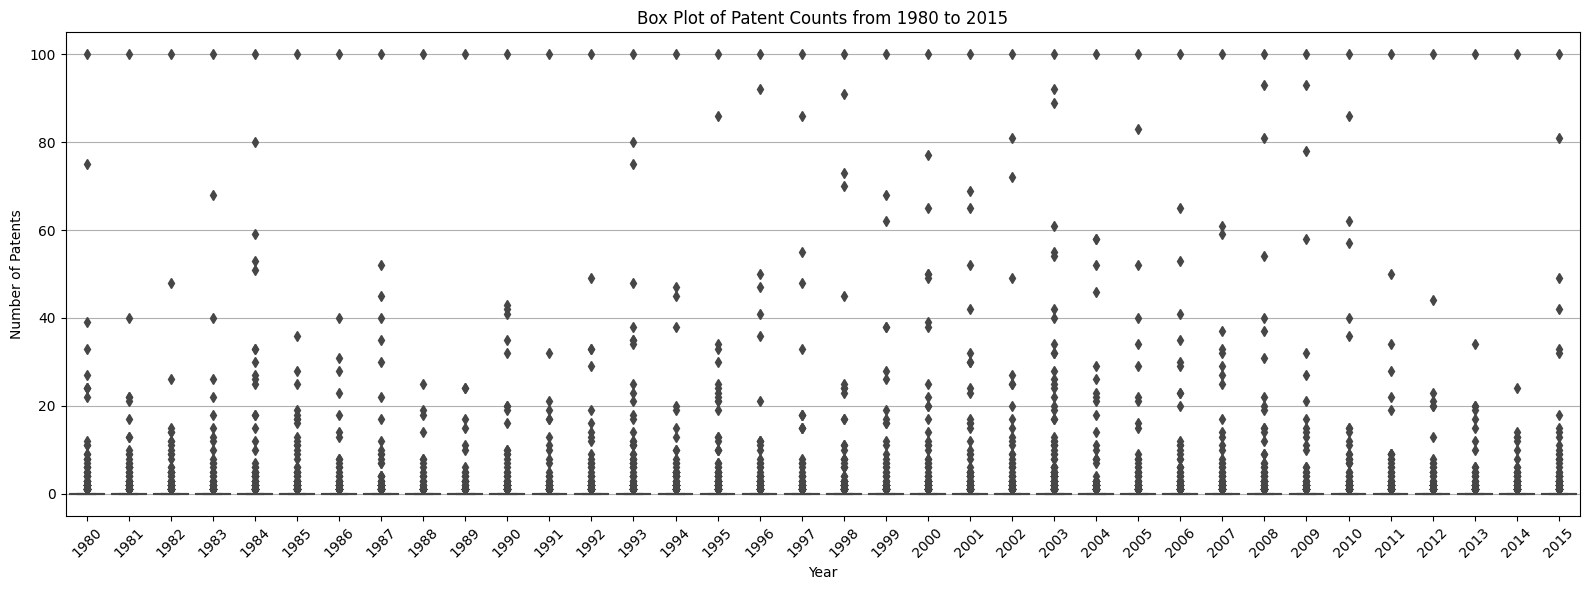

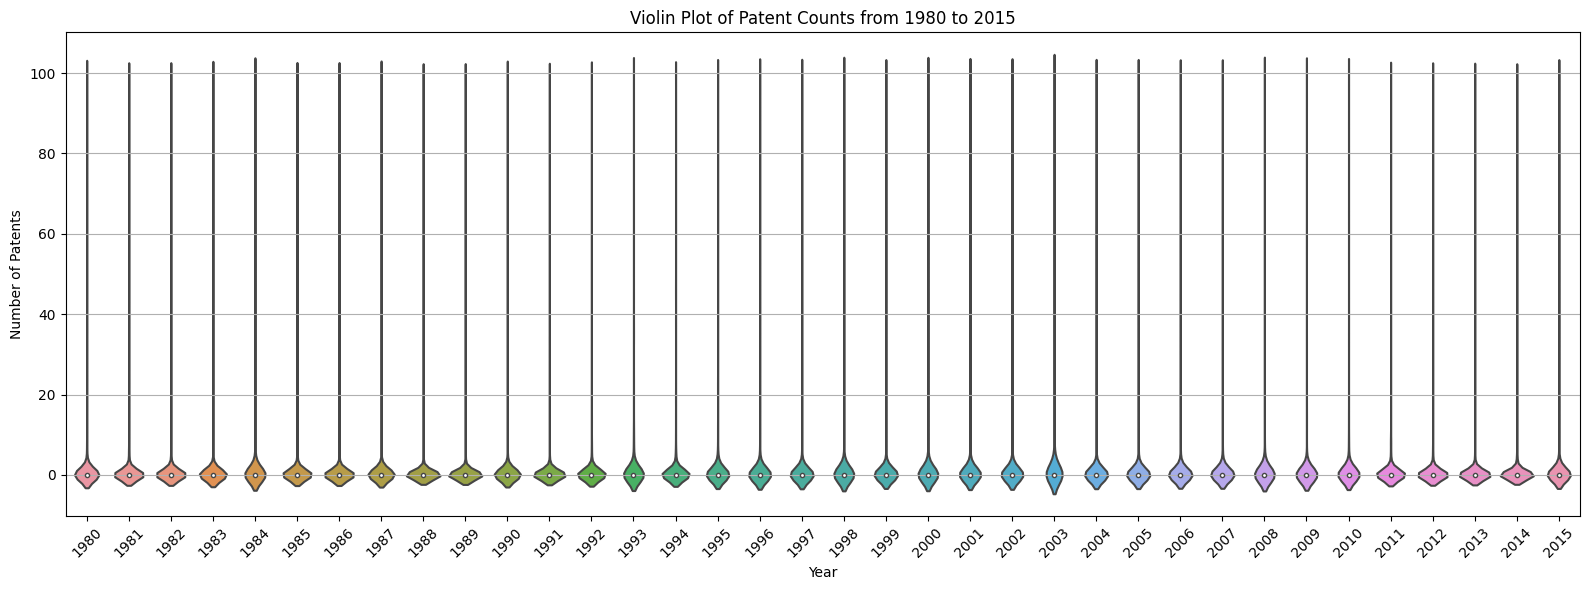

In [15]:
# Plot the box plot of patent data
plt.figure(figsize=(16, 6))
sns.boxplot(data=patent_data.drop(columns=["Unnamed: 0"]))
plt.title("Box Plot of Patent Counts from 1980 to 2015")
plt.xlabel("Year")
plt.ylabel("Number of Patents")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot the violin plot of patent data
plt.figure(figsize=(16, 6))
sns.violinplot(data=patent_data.drop(columns=["Unnamed: 0"]))
plt.title("Violin Plot of Patent Counts from 1980 to 2015")
plt.xlabel("Year")
plt.ylabel("Number of Patents")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


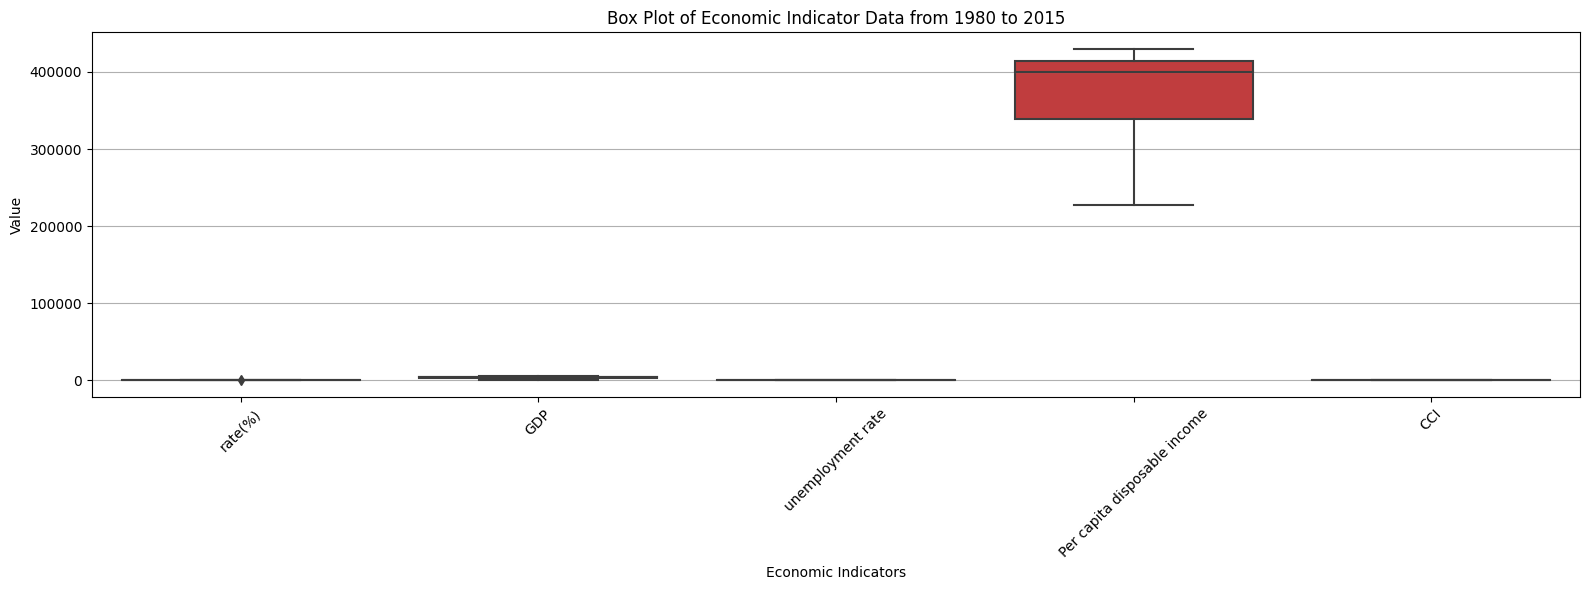

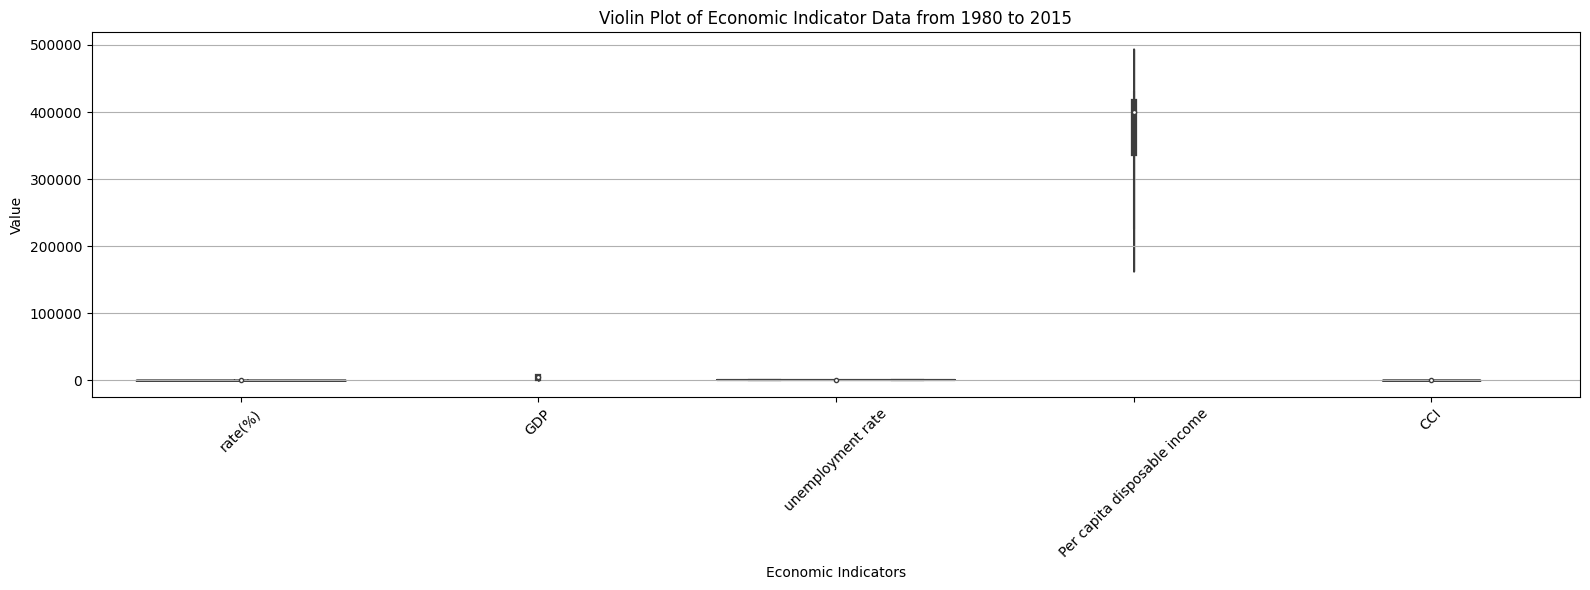

In [16]:
# Plot the box plot of economic indicator data
plt.figure(figsize=(16, 6))
sns.boxplot(data=gdp_data_transposed.drop(columns=["Year"]))
plt.title("Box Plot of Economic Indicator Data from 1980 to 2015")
plt.xlabel("Economic Indicators")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot the violin plot of economic indicator data
plt.figure(figsize=(16, 6))
sns.violinplot(data=gdp_data_transposed.drop(columns=["Year"]))
plt.title("Violin Plot of Economic Indicator Data from 1980 to 2015")
plt.xlabel("Economic Indicators")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [17]:
# Define the IQR method to detect outliers
def detect_outliers_iqr(series):
    """
    Detect outliers using the IQR method
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return series[(series < lower_bound) | (series > upper_bound)]

# Detect outliers for each year in the patent data
patent_outliers = {}
for column in patent_data.columns[1:]:
    patent_outliers[column] = detect_outliers_iqr(patent_data[column])

patent_outliers_df = pd.DataFrame.from_dict(patent_outliers, orient='index').transpose()

patent_outliers_df


,1980,1981,1984,1986,1987,1988,1990,2008,2010,2011,...,1996,1997,2000,2004,2006,2007,2009,2012,2014,1985
51,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,1.0,1.0,1.0,NaN,2.0,NaN,NaN,22.0,2.0,1.0,...,3.0,8.0,20.0,23.0,4.0,17.0,6.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [18]:
# Detect outliers for each year in the economic indicator data
gdp_outliers = {}
for column in gdp_data_transposed.columns[1:]:
    gdp_outliers[column] = detect_outliers_iqr(gdp_data_transposed[column])

gdp_outliers_df = pd.DataFrame.from_dict(gdp_outliers, orient='index').transpose()

gdp_outliers_df


,rate(%)
29,-5.4


In [19]:
# Remove patent categories from patent data where the patent count is 0 for all years
filtered_patent_data = patent_data[patent_data.drop(columns=["Unnamed: 0"]).sum(axis=1) > 0]

# Define a function to replace outliers
def replace_outliers_with_median(series):
    """
    Replace outliers with the median
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_indices = series[(series < lower_bound) | (series > upper_bound)].index
    series[outliers_indices] = series.median()

    return series

# Handle outliers for each year in the filtered patent data
for column in filtered_patent_data.columns[1:]:
    filtered_patent_data[column] = replace_outliers_with_median(filtered_patent_data[column])

# Handle outliers for each year in the economic indicator data
for column in gdp_data_transposed.columns[1:]:
    gdp_data_transposed[column] = replace_outliers_with_median(gdp_data_transposed[column])

filtered_patent_data, gdp_data_transposed


<ipython-input-19-6b5d4d7e4821>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers_indices] = series.median()
<ipython-input-19-6b5d4d7e4821>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[outliers_indices] = series.median()
<ipython-input-19-6b5d4d7e4821>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_patent_data[column] = replace_outliers_wi

(    Unnamed: 0  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...  \
 6         A01J     0     0     0     0     0     0     0     0     0  ...   
 51        A47C     1     2     0     0     1     0     0     1     0  ...   
 54        A47G     0     0     0     0     0     0     0     0     0  ...   
 59        A61B     1     0     0     0     0     0     0     0     0  ...   
 60        A61C     0     0     0     0     0     0     0     0     0  ...   
 ..         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
 636       H04S     0     0     0     0     0     1     0     0     0  ...   
 637       H04W     0     0     0     0     0     0     0     0     0  ...   
 638       H05B     0     0     0     0     1     0     0     0     0  ...   
 642       H05H     0     0     0     0     0     0     0     0     0  ...   
 643       H05K     0     1     0     0     0     1     0     2     0  ...   
 
      2006  2007  2008  2009  2010  2011  2012  2013  2014  20

In [20]:
# Transpose the patent data to match the format
filtered_patent_data_transposed = filtered_patent_data.set_index("Unnamed: 0").transpose().reset_index()
filtered_patent_data_transposed.rename(columns={"index": "Year"}, inplace=True)
filtered_patent_data_transposed["Year"] = filtered_patent_data_transposed["Year"].astype(int)

# Merge the economic indicator data with the transposed patent data
merged_data = filtered_patent_data_transposed.merge(gdp_data_transposed, on="Year", how="left")

merged_data
# Save the merged data to a CSV file
merged_data.to_csv('merged_patent_gdp_data.csv', index=False)


In [21]:
# Transpose the data
melted_data = merged_data.melt(id_vars=["Year"], var_name="Feature", value_name="Value")
melted_data["Year"] = melted_data["Year"].astype(int)  # Convert the 'Year' column to integer type

melted_data.head()


,Year,Feature,Value
0,1980,A01J,0.0
1,1981,A01J,0.0
2,1982,A01J,0.0
3,1983,A01J,0.0
4,1984,A01J,0.0


In [22]:

train_data = melted_data[melted_data["Year"] <= 2010]
test_data = melted_data[melted_data["Year"] > 2010]

train_data.shape, test_data.shape


((8308, 3), (1340, 3))

In [23]:
# Add lagged terms
train_data["Lag1"] = train_data.groupby("Feature")["Value"].shift(1)
test_data["Lag1"] = test_data.groupby("Feature")["Value"].shift(1)

# For the first year of the training data, the lagged term will be NaN, so we set it to 0
train_data["Lag1"].fillna(0, inplace=True)

train_data.head()


<ipython-input-23-24c10718b0af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Lag1"] = train_data.groupby("Feature")["Value"].shift(1)
<ipython-input-23-24c10718b0af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Lag1"] = test_data.groupby("Feature")["Value"].shift(1)
<ipython-input-23-24c10718b0af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Year,Feature,Value,Lag1
0,1980,A01J,0.0,0.0
1,1981,A01J,0.0,0.0
2,1982,A01J,0.0,0.0
3,1983,A01J,0.0,0.0
4,1984,A01J,0.0,0.0


In [24]:
# Add rolling window statistical features
train_data["Rolling_Mean_3"] = train_data.groupby("Feature")["Value"].transform(lambda x: x.rolling(3).mean().shift(1))
test_data["Rolling_Mean_3"] = test_data.groupby("Feature")["Value"].transform(lambda x: x.rolling(3).mean().shift(1))

# For the first two years of the training data, the rolling window statistical feature will be NaN, so we set it to 0
train_data["Rolling_Mean_3"].fillna(0, inplace=True)

train_data.head()


<ipython-input-24-536813df4970>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Rolling_Mean_3"] = train_data.groupby("Feature")["Value"].transform(lambda x: x.rolling(3).mean().shift(1))
<ipython-input-24-536813df4970>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Rolling_Mean_3"] = test_data.groupby("Feature")["Value"].transform(lambda x: x.rolling(3).mean().shift(1))
<ipython-input-24-536813df4970>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Year,Feature,Value,Lag1,Rolling_Mean_3
0,1980,A01J,0.0,0.0,0.0
1,1981,A01J,0.0,0.0,0.0
2,1982,A01J,0.0,0.0,0.0
3,1983,A01J,0.0,0.0,0.0
4,1984,A01J,0.0,0.0,0.0


In [25]:
# Perform label encoding
label_encoder = LabelEncoder()
train_data["Feature_Encoded"] = label_encoder.fit_transform(train_data["Feature"])
test_data["Feature_Encoded"] = label_encoder.transform(test_data["Feature"])

train_data.head()


<ipython-input-25-71bc33741c54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Feature_Encoded"] = label_encoder.fit_transform(train_data["Feature"])
<ipython-input-25-71bc33741c54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Feature_Encoded"] = label_encoder.transform(test_data["Feature"])


,Year,Feature,Value,Lag1,Rolling_Mean_3,Feature_Encoded
0,1980,A01J,0.0,0.0,0.0,0
1,1981,A01J,0.0,0.0,0.0,0
2,1982,A01J,0.0,0.0,0.0,0
3,1983,A01J,0.0,0.0,0.0,0
4,1984,A01J,0.0,0.0,0.0,0


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
def auto_arima_parameters(train_series, p_max=3, d_max=2, q_max=3):
    """Automatically select ARIMA parameters"""
    best_aic = float('inf')
    best_order = None

    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                try:
                    model = ARIMA(train_series, order=(p,d,q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue
    return best_order


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the function above to re-simulate the model and make predictions
maes = []
mses = []
r2_scores = []
predictions_dict = {}

for feature in train_data["Feature"].unique():
    train_series = train_data[train_data["Feature"] == feature].set_index("Year")["Value"]
    test_series = test_data[test_data["Feature"] == feature].set_index("Year")["Value"]

    # Get the best parameters
    best_order = auto_arima_parameters(train_series)

    # Make predictions using the best parameters
    model = ARIMA(train_series, order=best_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_series))

    # Store the predictions
    predictions_dict[feature] = predictions

    # Calculate MAE, MSE, and R^2
    maes.append(mean_absolute_error(test_series, predictions))
    mses.append(mean_squared_error(test_series, predictions))
    r2_scores.append(r2_score(test_series, predictions))

# Calculate the overall average MAE, MSE, and R^2
average_mae = sum(maes) / len(maes)
average_mse = sum(mses) / len(mses)
average_rmse = (average_mse)**0.5
average_r2 = sum(r2_scores) / len(r2_scores)

# Convert the predictions dictionary to DataFrame and save it as a CSV file
predictions_df = pd.DataFrame(predictions_dict)
predictions_filepath = "/content/predictions_merged.csv"
predictions_df.to_csv(predictions_filepath)


流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index wa

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Use the function above to re-simulate the model and make predictions
maes = []
mses = []
r2_scores = []
predictions_dict = {}

for feature in train_data["Feature"].unique():
    train_series = train_data[train_data["Feature"] == feature].set_index("Year")["Value"]
    test_series = test_data[test_data["Feature"] == feature].set_index("Year")["Value"]

    # Get the best parameters
    best_order = auto_arima_parameters(train_series)

    # Make predictions using the best parameters
    model = ARIMA(train_series, order=best_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_series))

    # Store the predictions
    predictions_dict[feature] = predictions

    # Calculate MAE, MSE, and R^2
    maes.append(mean_absolute_error(test_series, predictions))
    mses.append(mean_squared_error(test_series, predictions))
    r2_scores.append(r2_score(test_series, predictions))

# Calculate the overall average MAE, MSE, and R^2
average_mae = sum(maes) / len(maes)
average_mse = sum(mses) / len(mses)
average_rmse = (average_mse)**0.5
average_r2 = sum(r2_scores) / len(r2_scores)

# Convert the predictions dictionary to DataFrame and save it as a CSV file
predictions_df = pd.DataFrame(predictions_dict)
predictions_filepath = "predictions_merged2.csv"
predictions_df.to_csv(predictions_filepath)


流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index wa

In [30]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the actual values
true_values_df = pd.read_csv('/content/merged_patent_gdp_data.csv')
# Select the data from 2011 to 2015
true_values_df = true_values_df[true_values_df['Year'].between(2011, 2015)]

# Load the predicted values
predictions_df = pd.read_csv('/content/predictions_merged.csv')
# Rename the first column to "Year"
predictions_df.rename(columns={predictions_df.columns[0]: "Year"}, inplace=True)
predictions_df.head()
# Replace the years in the predictions to 2011-2015
predictions_df['Year'] = predictions_df['Year'].replace({31: 2011, 32: 2012, 33: 2013, 34: 2014, 35: 2015})


In [31]:
print("Shape of true_values:", true_values_df.shape)
print("Shape of predictions:", predictions_df.shape)

print("\nHead of true_values:")
print(true_values_df.head())

print("\nHead of predictions:")
print(predictions_df.head())

Shape of true_values: (5, 269)
Shape of predictions: (5, 269)

Head of true_values:
    Year  A01J  A47C  A47G  A61B  A61C  A61F  A61K  A61L  A61M  ...  H04S  \
31  2011     0     1     0     0     0     0     0     0     0  ...     0   
32  2012     0     0     0     0     0     0     0     0     0  ...     0   
33  2013     0     0     0     1     0     0     0     0     0  ...     0   
34  2014     0     0     0     0     0     0     0     0     0  ...     0   
35  2015     0     0     0     0     0     0     1     0     0  ...     0   

    H04W  H05B  H05H  H05K  rate(%)     GDP  unemployment rate  \
31     0     2     0     2     -0.1  6157.6               56.5   
32     0     0     0     0      1.4  6203.2               56.5   
33     1     0     0     1      2.0  4919.3               56.9   
34     0     0     0     0      0.3  4848.9               57.3   
35     1     0     0     1      1.2  4383.8               57.6   

    Per capita disposable income        CCI  
31        

In [32]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the actual values
true_values_df = pd.read_csv('/content/merged_patent_gdp_data.csv')
# Select the data from 2011 to 2015
true_values_df = true_values_df[true_values_df['Year'].between(2011, 2015)]

# Load the predicted values
predictions_df = pd.read_csv('/content/predictions_merged.csv')
# Rename the first column to "Year"
predictions_df.rename(columns={predictions_df.columns[0]: "Year"}, inplace=True)
predictions_df.head()
# Replace the years in the predictions to 2011-2015
predictions_df['Year'] = predictions_df['Year'].replace({31: 2011, 32: 2012, 33: 2013, 34: 2014, 35: 2015})

# Use a regular expression to select columns related to patents
patent_columns = true_values_df.filter(regex='^[A-Z0-9]+$').columns

# Select only the patent data for evaluation
true_values = true_values_df[['Year'] + patent_columns.tolist()].set_index('Year')
predictions = predictions_df[['Year'] + patent_columns.tolist()].set_index('Year')

# Calculate the evaluation metrics
mae = mean_absolute_error(true_values, predictions)
mse = mean_squared_error(true_values, predictions)
rmse = mse**0.5
r2 = r2_score(true_values, predictions)



random forest

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
data = pd.read_csv('/content/merged_patent_gdp_data.csv')

# Split data
train_data = data[data["Year"] <= 2010]
test_data = data[data["Year"] > 2010]

patent_columns = train_data.columns[1:-5].tolist()
economic_columns = ["rate(%)", "GDP", "unemployment rate", "Per capita disposable income", "CCI"]
all_columns = patent_columns + economic_columns

train_features_patent = train_data[patent_columns]
test_features_patent = test_data[patent_columns]

train_features_all = train_data[all_columns]
test_features_all = test_data[all_columns]

train_labels = train_data[patent_columns]
test_labels = test_data[patent_columns]

# Post processing function
def post_process(predictions):
    predictions = np.round(predictions)
    predictions = np.maximum(predictions, 0)
    return predictions

# Train and evaluate with the optimized Random Forest using the best parameters
def train_and_evaluate_rf_optimized(train_features, test_features, train_labels, test_labels, best_params):
    rf = RandomForestRegressor(**best_params, random_state=42)
    rf.fit(train_features, train_labels)

    predictions = rf.predict(test_features)
    predictions = post_process(predictions)

    mse = mean_squared_error(test_labels, predictions)
    mae = mean_absolute_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)

    print("MSE:", mse)
    print("MAE:", mae)
    print("R^2:", r2)

    return predictions, mse, mae, r2

# Random search for hyperparameter optimization
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='r2')

random_search.fit(train_features_all, train_labels)

best_params_random = random_search.best_params_

# Train and evaluate models with optimized parameters
print("Performance metrics for model with patent data only:")
predictions_patent_optimized, _, _, _ = train_and_evaluate_rf_optimized(train_features_patent, test_features_patent, train_labels, test_labels, best_params_random)

print("\nPerformance metrics for model with patent and economic data:")
predictions_all_optimized, _, _, _ = train_and_evaluate_rf_optimized(train_features_all, test_features_all, train_labels, test_labels, best_params_random)

# Save predictions to CSV files
predictions_patent_df = pd.DataFrame(predictions_patent_optimized, columns=patent_columns)
predictions_patent_df["Year"] = test_data["Year"].values
predictions_patent_df.to_csv("/content/patent_only_optimized.csv", index=False)

predictions_all_df = pd.DataFrame(predictions_all_optimized, columns=patent_columns)
predictions_all_df["Year"] = test_data["Year"].values
predictions_all_df.to_csv("/content/patent_and_economic_optimized.csv", index=False)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Performance metrics for model with patent data only:
MSE: 0.17642585551330797
MAE: 0.13384030418250953
R^2: 0.5039720260727867

Performance metrics for model with patent and economic data:
MSE: 0.15893536121673005
MAE: 0.12851711026615972
R^2: 0.5325457179069347


In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data
data = pd.read_csv('/content/merged_patent_gdp_data.csv')

# Split data
train_data = data[data["Year"] <= 2010]
test_data = data[data["Year"] > 2010]

patent_columns = train_data.columns[1:-5].tolist()
economic_columns = ["rate(%)", "GDP", "unemployment rate", "Per capita disposable income", "CCI"]
all_columns = patent_columns + economic_columns

train_features_patent = train_data[patent_columns]
test_features_patent = test_data[patent_columns]

train_features_all = train_data[all_columns]
test_features_all = test_data[all_columns]

train_labels = train_data[patent_columns]
test_labels = test_data[patent_columns]

# Post processing function
def post_process(predictions):
    predictions = np.round(predictions)
    predictions = np.maximum(predictions, 0)
    return predictions

# Train and evaluate using Gradient Boosting for the entire dataset
def train_and_evaluate_gbm(train_features, test_features, train_labels, test_labels, model_type):
    predictions = []
    for column in patent_columns:
        gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
        gbm.fit(train_features, train_labels[column])
        pred = gbm.predict(test_features)
        predictions.append(post_process(pred))

    predictions = np.array(predictions).T

    mse = mean_squared_error(test_labels, predictions)
    mae = mean_absolute_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)


    return predictions

# Train and evaluate models
print("Performance metrics for GBM model with patent data only:")
predictions_patent_gbm = train_and_evaluate_gbm(train_features_patent, test_features_patent, train_labels, test_labels, "patent data only")
predictions_patent_df = pd.DataFrame(predictions_patent_gbm, columns=patent_columns)
predictions_patent_df["Year"] = test_data["Year"].values
predictions_patent_df.to_csv("/content/patent_only_gbm.csv", index=False)

print("\nPerformance metrics for GBM model with patent and economic data:")
predictions_all_gbm = train_and_evaluate_gbm(train_features_all, test_features_all, train_labels, test_labels, "patent and economic data")
predictions_all_df = pd.DataFrame(predictions_all_gbm, columns=patent_columns)
predictions_all_df["Year"] = test_data["Year"].values
predictions_all_df.to_csv("/content/patent_and_economic_gbm.csv", index=False)


Performance metrics for GBM model with patent data only:

Performance metrics for GBM model with patent and economic data:


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
merged_data = pd.read_csv('/content/merged_patent_gdp_data.csv')

# Filter only patent columns based on the structure of your data
patent_columns = merged_data.columns[1:-5].tolist()  # Assuming last 5 columns are economic data

# Select only patent related columns
patent_data = merged_data[["Year"] + patent_columns]

# Melt the data
melted_data = patent_data.melt(id_vars=["Year"], var_name="Feature", value_name="Value")
melted_data["Year"] = melted_data["Year"].astype(int)

# Split the data
train_data = melted_data[melted_data["Year"] <= 2010]
test_data = melted_data[melted_data["Year"] > 2010]

# Add lag feature
train_data["Lag1"] = train_data.groupby("Feature")["Value"].shift(1)
test_data["Lag1"] = test_data.groupby("Feature")["Value"].shift(1)
train_data["Lag1"].fillna(0, inplace=True)
train_data.head()

<ipython-input-37-a3b2fc811540>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Lag1"] = train_data.groupby("Feature")["Value"].shift(1)
<ipython-input-37-a3b2fc811540>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Lag1"] = test_data.groupby("Feature")["Value"].shift(1)
<ipython-input-37-a3b2fc811540>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Year,Feature,Value,Lag1
0,1980,A01J,0,0.0
1,1981,A01J,0,0.0
2,1982,A01J,0,0.0
3,1983,A01J,0,0.0
4,1984,A01J,0,0.0


In [38]:


# Add rolling mean feature
train_data["Rolling_Mean_3"] = train_data.groupby("Feature")["Value"].transform(lambda x: x.rolling(3).mean().shift(1))
test_data["Rolling_Mean_3"] = test_data.groupby("Feature")["Value"].transform(lambda x: x.rolling(3).mean().shift(1))
train_data["Rolling_Mean_3"].fillna(0, inplace=True)

# Label encode the feature names
label_encoder = LabelEncoder()
train_data["Feature_Encoded"] = label_encoder.fit_transform(train_data["Feature"])
test_data["Feature_Encoded"] = label_encoder.transform(test_data["Feature"])

# Function to automatically select ARIMA parameters
def auto_arima_parameters(train_series, p_max=3, d_max=2, q_max=3):
    best_aic = float('inf')
    best_order = None

    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                try:
                    model = ARIMA(train_series, order=(p,d,q))
                    model_fit = model.fit()
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                except:
                    continue
    return best_order

# Perform ARIMA modeling and predictions
maes = []
mses = []
r2_scores = []
predictions_dict = {}

for feature in train_data["Feature"].unique():
    train_series = train_data[train_data["Feature"] == feature].set_index("Year")["Value"]
    test_series = test_data[test_data["Feature"] == feature].set_index("Year")["Value"]

    best_order = auto_arima_parameters(train_series)

    model = ARIMA(train_series, order=best_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_series))

    predictions_dict[feature] = predictions

    maes.append(mean_absolute_error(test_series, predictions))
    mses.append(mean_squared_error(test_series, predictions))
    r2_scores.append(r2_score(test_series, predictions))

average_mae = sum(maes) / len(maes)
average_mse = sum(mses) / len(mses)
average_rmse = (average_mse)**0.5
average_r2 = sum(r2_scores) / len(r2_scores)

predictions_df = pd.DataFrame(predictions_dict)
predictions_filepath = "/content/patent_predictions_arima.csv"
predictions_df.to_csv(predictions_filepath)


流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignore

In [39]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# 1. Load the data
merged_data = pd.read_csv('/content/merged_patent_gdp_data.csv')

# 2. Data preprocessing
# Adjusting the transpose based on the correct column names
melted_data = merged_data.melt(id_vars=["Year", "rate(%)", "GDP", "unemployment rate", "Per capita disposable income", "CCI"],
                               var_name="Patent_Type",
                               value_name="Patent_Count")

# Split the dataset
train_data = melted_data[melted_data["Year"] <= 2010]
test_data = melted_data[melted_data["Year"] > 2010]

# Add lagged terms
train_data["Lag1"] = train_data.groupby("Patent_Type")["Patent_Count"].shift(1)
test_data["Lag1"] = test_data.groupby("Patent_Type")["Patent_Count"].shift(1)
train_data["Lag1"].fillna(0, inplace=True)

# Add rolling window statistical features
train_data["Rolling_Mean_3"] = train_data.groupby("Patent_Type")["Patent_Count"].transform(lambda x: x.rolling(3).mean().shift(1))
test_data["Rolling_Mean_3"] = test_data.groupby("Patent_Type")["Patent_Count"].transform(lambda x: x.rolling(3).mean().shift(1))
train_data["Rolling_Mean_3"].fillna(0, inplace=True)

# Perform label encoding
label_encoder = LabelEncoder()
train_data["Patent_Type_Encoded"] = label_encoder.fit_transform(train_data["Patent_Type"])
test_data["Patent_Type_Encoded"] = label_encoder.transform(test_data["Patent_Type"])

# 3. Predict using the SARIMAX model
fixed_order = (1, 1, 1)
predictions_dict = {}

for patent_type in train_data["Patent_Type"].unique():
    train_subset = train_data[train_data["Patent_Type"] == patent_type].set_index("Year")
    test_subset = test_data[test_data["Patent_Type"] == patent_type].set_index("Year")

    exog_train = train_subset[["rate(%)", "GDP", "unemployment rate", "Per capita disposable income", "CCI"]]
    exog_test = test_subset[["rate(%)", "GDP", "unemployment rate", "Per capita disposable income", "CCI"]]

    model = SARIMAX(train_subset["Patent_Count"],
                    exog=exog_train,
                    order=fixed_order,
                    seasonal_order=(0, 0, 0, 0),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    model_fit = model.fit(disp=False)
    predictions = model_fit.forecast(steps=len(test_subset), exog=exog_test)

    # Convert the predictions to integers and ensure they are positive
    predictions = predictions.round().clip(lower=0)

    predictions_dict[patent_type] = predictions

# 4. Save the predictions to a CSV file
predictions_df = pd.DataFrame(predictions_dict)
predictions_df.to_csv("SARIMAX_predictions.csv")

print("Predictions completed!")


<ipython-input-39-0683ba4687e3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Lag1"] = train_data.groupby("Patent_Type")["Patent_Count"].shift(1)
<ipython-input-39-0683ba4687e3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Lag1"] = test_data.groupby("Patent_Type")["Patent_Count"].shift(1)
<ipython-input-39-0683ba4687e3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

Predictions completed!


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
